## Data Preprocessing and Feature Engineering in Machine Learning

### 1. Data Exploration and Preprocessing:

In [1]:
#Load the dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\SHREYAS\Desktop\adult_with_headers.csv")

In [2]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
# Summary statistics, missing values, and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Check missing values

print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [8]:
# There are no missing values.

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [10]:
# Scaling (Standard Scaling & Min-Max Scaling)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

df_standard_scaled = df.copy()
df_minmax_scaled = df.copy()

df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df[numerical_features])
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

In [11]:
print(df_minmax_scaled[numerical_features])

            age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.301370  0.044302       0.800000      0.021740           0.0   
1      0.452055  0.048238       0.800000      0.000000           0.0   
2      0.287671  0.138113       0.533333      0.000000           0.0   
3      0.493151  0.151068       0.400000      0.000000           0.0   
4      0.150685  0.221488       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.136986  0.166404       0.733333      0.000000           0.0   
32557  0.315068  0.096500       0.533333      0.000000           0.0   
32558  0.561644  0.094827       0.533333      0.000000           0.0   
32559  0.068493  0.128499       0.533333      0.000000           0.0   
32560  0.479452  0.187203       0.533333      0.150242           0.0   

       hours_per_week  
0            0.397959  
1            0.122449  
2            0.397959  
3            0.397959  
4            0.

In [12]:
print(df_standard_scaled[numerical_features])

            age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.030671 -1.063611       1.134739      0.148453      -0.21666   
1      0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2     -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3      1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4     -0.775768  1.408176       1.134739     -0.145920      -0.21666   
...         ...       ...            ...           ...           ...   
32556 -0.849080  0.639741       0.746039     -0.145920      -0.21666   
32557  0.103983 -0.335433      -0.420060     -0.145920      -0.21666   
32558  1.423610 -0.358777      -0.420060     -0.145920      -0.21666   
32559 -1.215643  0.110960      -0.420060     -0.145920      -0.21666   
32560  0.983734  0.929893      -0.420060      1.888424      -0.21666   

       hours_per_week  
0           -0.035429  
1           -2.222153  
2           -0.035429  
3           -0.035429  
4           -0.

#### Discuss the scenarios where each scaling technique is preferred and why.

- Standard Scaling (Z-score): Used when data is normally distributed. Preferred for algorithms like Linear Regression, SVM, and PCA. Handles varying feature magnitudes well.

- Min-Max Scaling (Normalization): Used when data is not normally distributed and needs to be in a fixed range (0 to 1). Suitable for KNN, Neural Networks, and image processing. Sensitive to outliers.

### 2. Encoding Techniques:

In [13]:
# One-Hot Encoding for categorical variables with <5 categories

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_features:
    if df[col].nunique() < 5:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [14]:
# Label Encoding for categorical variables with >5 categories

label_encoder = LabelEncoder()

for col in categorical_features:
    if col in df.columns and df[col].nunique() >= 5:
        if col not in df.columns:  # Skip if already One-Hot Encoded
            print(f"Skipping {col} (possibly one-hot encoded)")
            continue
        df[col] = label_encoder.fit_transform(df[col])

#### Discuss the pros and cons of One-Hot Encoding and Label Encoding.

1) One-Hot Encoding
- Pros:
   - No ordinal relationship introduced between categories.
   - Works well with algorithms that don’t assume order (e.g., Decision Trees, Neural Networks).
- Cons:
    - Increases dimensionality if categories are too many (Curse of Dimensionality).
    - Requires more memory and processing time.
      
2) Label Encoding
- Pros:
    - Efficient in terms of memory and performance.
    - Suitable for ordinal categorical data where order matters (e.g., Low, Medium, High).
- Cons:
    - Introduces an artificial ranking if used on non-ordinal data, which can mislead models (e.g.,            'Red' < 'Blue' < 'Green' has no real meaning).
    - Not ideal for tree-based models as it may introduce bias.

### 3. Feature Engineering:

In [15]:
# Creating new features

df['work_hours_per_week'] = df['hours_per_week'] / 40  # Reason: Normalize work hours
df['age_income_ratio'] = df['age'] / (df['fnlwgt'] + 1)  # Reason: Age to income ratio

In [16]:
# Transforming skewed feature

import numpy as np

df['capital-gain'] = np.log1p(df['capital_gain'])

#### Justification
- Log transformation helps normalize skewed data, making it more symmetric.
- Reduces the impact of outliers.
- Improves performance for models assuming normality for eg Linear Regression.

### 4. Feature Selection:

In [17]:
# Using Isolation Forest for outlier removal

from sklearn.ensemble import IsolationForest
import ppscore as pps

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df[numerical_features])
df = df[outliers == 1]  # This Remove the outliers

#### How Outliers Affect Model Performance
- Distorted Predictions
- Increased Model Complexity
- Poor Convergence
- Reduced Accuracy

In [19]:
print(pps_matrix.columns)

Index(['x', 'y', 'ppscore', 'case', 'is_valid_score', 'metric',
       'baseline_score', 'model_score', 'model'],
      dtype='object')


In [21]:
# Applying PPS Score

pps_matrix = pps.matrix(df)
pps_matrix[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False)

,x,y,ppscore
0,age,age,1.0
152,race,race,1.0
57,education,education,1.0
58,education,education_num,1.0
75,education_num,education,1.0
...,...,...,...
136,relationship,capital_loss,0.0
137,relationship,hours_per_week,0.0
138,relationship,native_country,0.0
140,relationship,income_ >50K,0.0


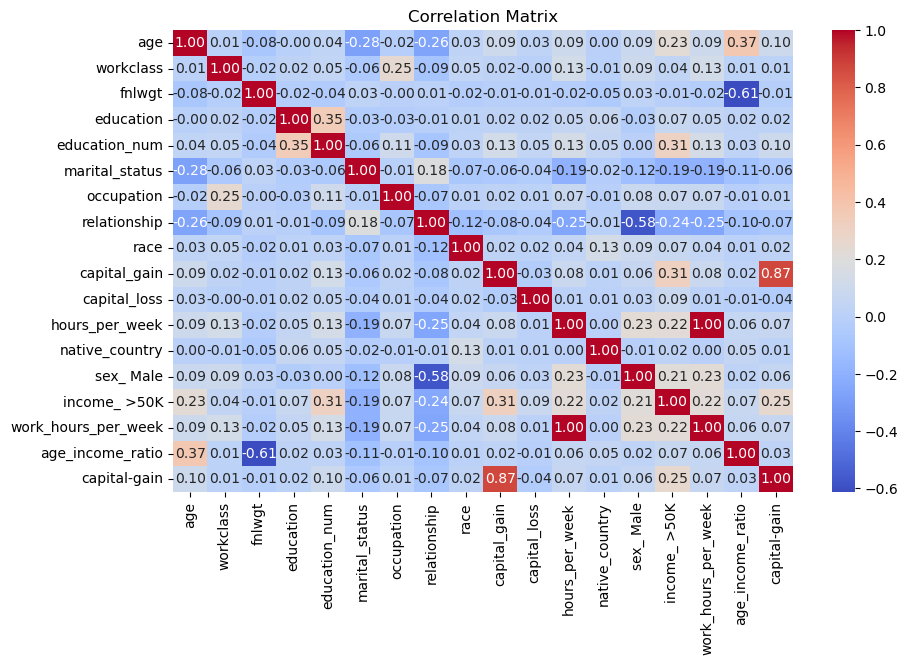

In [22]:
# Compare with Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Compare its findings with the correlation matrix.
- Correlation Matrix: Measures linear relationships only values between -1 and 1.
- PPS Score: Measures both linear and non-linear relationships values between 0 and 1.